<h1>  California - Housing Data Analysis and Data Visualization 


<h4> This project gives the analysis of the housing distribution in California according to income, age and other factors. The data set has continuous data(latitude,longitude,median_income), discrete data(housing_median_age, total_rooms,total_bedrooms,population,households,median_house_value) and nominal data(ocean_proximity)


In [42]:
import pandas as pd  #importing pandas library
import matplotlib.pyplot as plt  #importing matplotlib for data visualization
import seaborn as sns  #importing matplotlib for data visualization
housing_data = pd.read_excel("housing.xlsx")  #reading dataset from excel file"housing.xlsx" and storing in the dataframe 'housing_data'

In [43]:
# 1. calculate mean income of the data set
mean_income = housing_data['median_income'].mean() 
print(mean_income) # o/p: mean income of California is 3.87$

3.8706710029069766


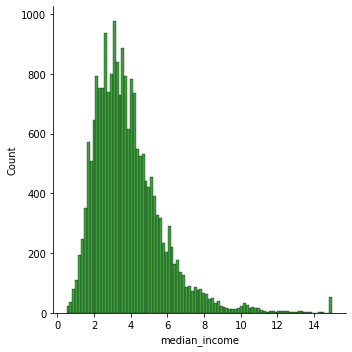

" The income is right skewed and most of the data falls to the right, or positive side, of the graph's peak "

In [44]:
from seaborn.palettes import color_palette
sns.displot(housing_data['median_income'],color='g') #density plot to check the distribution of the income
plt.show()

""" The income is right skewed and most of the data falls to the right, or positive side, of the graph's peak """

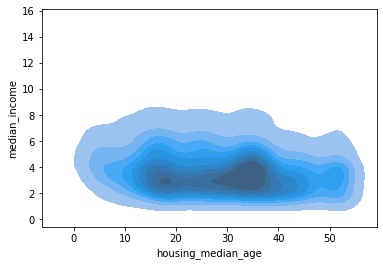

' The probability distribution is dense for income,age at 3$,28-38yrs and 19-20yrs respectively. \nThis is in relation with the previous question where we calculated the mean of the income to be 3.7$'

In [45]:
# 1. Distribution of Income in the age group of the data set
sns.kdeplot(y=housing_data['median_income'],x=housing_data['housing_median_age'],shade=True) #Kernel density plot to compare two variates with their probability ditribution
plt.show()

""" The probability distribution is dense for income,age at 3$,28-38yrs and 19-20yrs respectively. 
This is in relation with the previous question where we calculated the mean of the income to be 3.7$"""

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


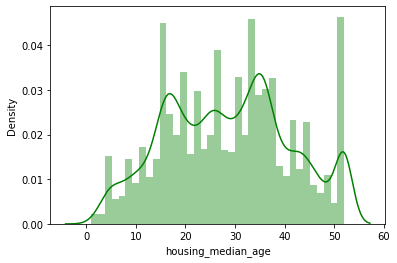

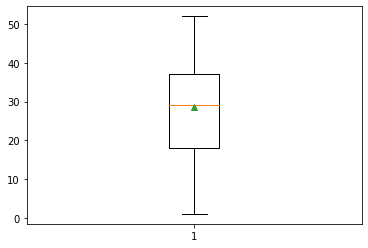

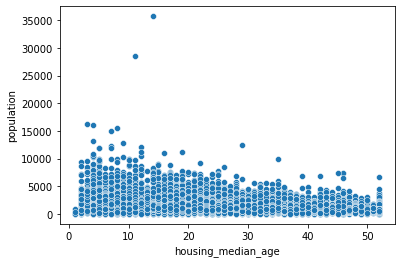

' The distribution indicates that the age data is not normal, following bimodal distribution.\nThe mean age of California is around 28 and most of them are middle-age and young adults.\nSo the young population is much more concentrated in California rather than the old adults.'

In [46]:
# 2. housing_median_age_distribution
sns.distplot(housing_data['housing_median_age'],color='green') # density plot for the age distribution
plt.show()
plt.boxplot(x=housing_data['housing_median_age'],showmeans=True)
plt.show()
sns.scatterplot( x = housing_data['housing_median_age'],y = housing_data['population'])
plt.show()
""" The distribution indicates that the age data is not normal, following bimodal distribution.
The mean age of California is around 28 and most of them are middle-age and young adults.
So the young population is much more concentrated in California rather than the old adults."""

' We see that the house_value has increased with the increase in income although the density is less with increase in income.\nThere are more people who earn between 1.8$-3$ and have house_value around 50000-100000$ '

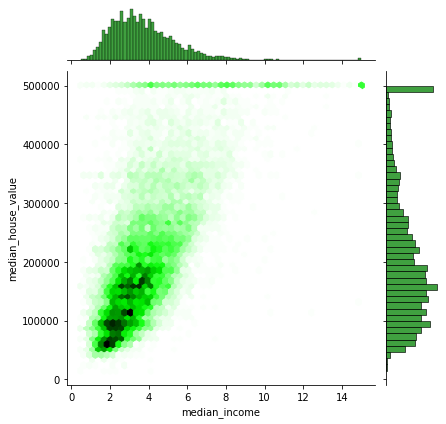

In [47]:
# 3. distribution of median_income and median_house_values
sns.jointplot(x='median_income',y='median_house_value',data=housing_data,kind='hex',color='g') #jointplot shows the relation b/w two variates and their individual probability ditribution
""" We see that the house_value has increased with the increase in income although the density is less with increase in income.
There are more people who earn between 1.8$-3$ and have house_value around 50000-100000$ """

**<h4>** 4. Create a data set by deleting the corresponding examples from the data set for which total_bedrooms are not available

In [48]:
#creating new_data dataset by deleting NaN values from 'total_bedrooms' column using dropna() function
new_data = housing_data.dropna(axis=0,subset=['total_bedrooms'])
print(housing_data.info()) # o/p: the original dataset is unmodified and no of entries are 20640
print(new_data.info()) # o/p: the no of entries after deleting the columns becomes 20433

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null

**<h4>** 5. Create a data set by filling the missing data with the mean value of the total_bedrooms in the original data set.



In [49]:
#creating new_data dataset by filling NaN values for 'total_bedrooms' column with mean of that column using fillna() function
new_data = housing_data.copy(deep=True) #created a copy of the dataframe to preserve the original dataset.
new_data['total_bedrooms'].fillna(new_data['total_bedrooms'].mean(),inplace=True) #fillna(value=mean_of_the_total_bedrooms)
new_data.info() # o/p: the no of non-null count in total_bedrooms is now 20640 from 20433

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


**<h4>** 6. Write a programming construct (create a user defined function) to calculate the median value of the data set wherever required

In [55]:
# user defined function for median of any column in the dataframe. If it is non-numerical then throws error telling 'Invalid data type' 
import numpy as np
def median_value(n):
  try:
    v  = np.array(n.sort_values()) #sort in ascending order
    if v.size%2==0:   # if size of the 1-d array is even then median = ((n/2)th+((n/2)+1)th)//2), else odd then median=((n+1)th//2)th term 
      return ((v[(v.size//2)-1]+v[v.size//2])/2) 
    return (v[((v.size+1)//2)-1])
  except:
    return('Invalid data type')
    
n = median_value(housing_data['housing_median_age'])
print(n) 

29.0


' We see negative correlation. However, the housing concentration in California is more concentrated near the coastal region and \nthe "Great Valley Region" and there is less concentration in the island areas '

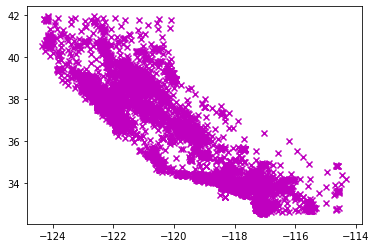

In [56]:
# 7. Plot latitude versus longitude and explain your observations

plt.scatter(x=housing_data['longitude'],y=housing_data['latitude'],c = 'm',marker="x") #scatter plot to plot longitude and latitude

""" We see negative correlation. However, the housing concentration in California is more concentrated near the coastal region and 
the "Great Valley Region" and there is less concentration in the island areas """


# **<h4>** 8. Create a data set for which the ocean_proximity is ‘Near ocean’

In [57]:
near_ocean = housing_data[housing_data['ocean_proximity'].str.title()=='Near Ocean'] #filters out the dataframe where ocean_proximity= 'Near Ocean'
near_ocean

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
1850,-124.17,41.80,16.0,2739.0,480.0,1259.0,436.0,3.7557,109400.0,NEAR OCEAN
1851,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0,NEAR OCEAN
1852,-124.23,41.75,11.0,3159.0,616.0,1343.0,479.0,2.4805,73200.0,NEAR OCEAN
1853,-124.21,41.77,17.0,3461.0,722.0,1947.0,647.0,2.5795,68400.0,NEAR OCEAN
1854,-124.19,41.78,15.0,3140.0,714.0,1645.0,640.0,1.6654,74600.0,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...,...
20380,-118.83,34.14,16.0,1316.0,194.0,450.0,173.0,10.1597,500001.0,NEAR OCEAN
20381,-118.83,34.14,16.0,1956.0,312.0,671.0,319.0,6.4001,321800.0,NEAR OCEAN
20423,-119.00,34.08,17.0,1822.0,438.0,578.0,291.0,5.4346,428600.0,NEAR OCEAN
20424,-118.75,34.18,4.0,16704.0,2704.0,6187.0,2207.0,6.6122,357600.0,NEAR OCEAN


**<h4>** 9. Find the mean and median of the median income for the data set created in question 8

In [58]:
print("Mean_income: ",near_ocean['median_income'].mean()) #mean of income
print("Median_income: ",near_ocean['median_income'].median()) #median of income

Mean_income:  4.0057848006019565
Median_income:  3.64705


**<h4>** 10. Please create a new column named total_bedroom_size. If the total bedrooms is 10 or less, it should be quoted as small. If the total bedrooms is 11 or more but less than 1000, it should be medium, otherwise it should be considered large.



In [64]:
#create a new column where total_bedroom_size='Large' if total_bedrooms >=1000, 'Medium' if total_bedrooms >=11 and <1000, else 'Small'

def new_value(column):
  if column>=1000:
    return 'Large'
  elif column>=11:
    return 'Medium'
  else:
    return 'Small'
housing_data['total_bedroom_size'] = housing_data['total_bedrooms'].apply(new_value) #apply() to apply the function to the dataframe 


In [69]:
d = housing_data['total_bedrooms'].isna().value_counts()
print(d)

False    20433
True       207
Name: total_bedrooms, dtype: int64
